# Netflix recommendation engine
Supplementary info, check out in Tableau: https://public.tableau.com/views/Netflix_16175273771650/Dashboard1?:language=en-GB&:display_count=y&publish=yes&:origin=viz_share_link

In [1]:
import pandas as pd
import numpy as np

In [2]:
movie = pd.read_csv("netflix_titles.csv")

In [3]:
print(movie.shape)
movie.head(10)

(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [4]:
movie.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

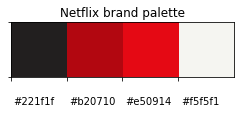

In [7]:
# Palette
colour = ['#221f1f', '#b20710', '#e50914','#f5f5f1']
sns.palplot(colour)
ax = plt.gca()

plt.title("Netflix brand palette")
for i, name in enumerate(colour):
    ax.text(i-0.45,1, name) 
plt.show()

<BarContainer object of 2 artists>

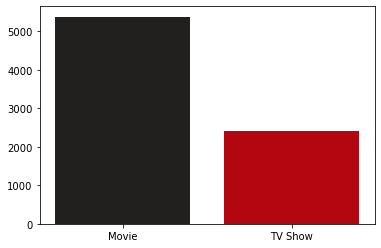

In [8]:
movie_type = movie.groupby('type').show_id.count()
plt.bar(x = movie_type.index, height=movie_type.values, color=colour)

Text(-2, -2, 'Which year has the most movies/TV shows be released?')

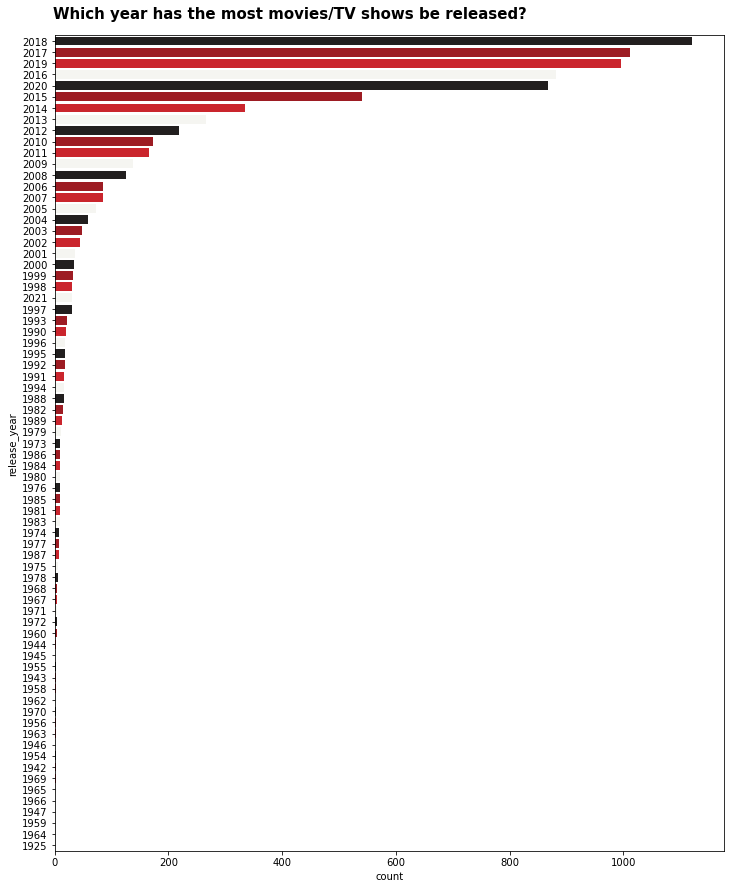

In [39]:
plt.figure(figsize=(12,15))
sns.countplot(y="release_year", data=movie, palette=colour, order=movie['release_year'].value_counts().index)
plt.text(-2,-2,"Which year has the most movies/TV shows be released?", family='sans-serif', fontsize=15, weight='bold')

In [19]:
movie['date_added'] = pd.to_datetime(movie['date_added'])
movie['date_added_year'] = movie['date_added'].dt.year
movie['date_added_month'] = movie['date_added'].dt.month

Text(-2, -2, 'Which month has the most movies/TV shows be added?')

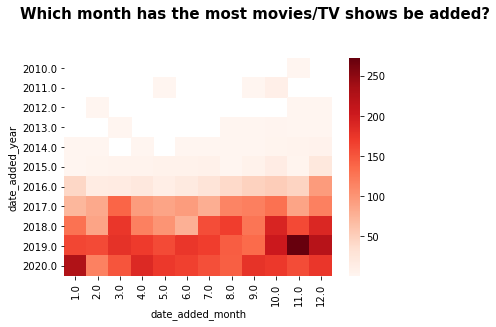

In [32]:
sns.heatmap(movie.loc[movie['date_added_year'].fillna(0).astype(int).between(2010,2020)].
            pivot_table(values='show_id',index='date_added_year',columns='date_added_month',aggfunc='count'),
           cmap='Reds')
plt.text(-2,-2,"Which month has the most movies/TV shows be added?", family='sans-serif', fontsize=15, weight='bold')

In [21]:
pip install plotly==4.14.3

  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=40964f991e382c5a8f64aedf3e2d18d204cee1abcec5e934ed8a08d5357bce6a
  Stored in directory: /Users/cathy/Library/Caches/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [22]:
import plotly.graph_objects as go

In [23]:
import plotly.express as px

In [38]:
country = movie.groupby('country').show_id.count().reset_index()
country = country.rename(columns={'show_id':'no of movies'})
fig = px.treemap(country, path=['country','no of movies'], values='no of movies',
                title='Distribution by country')
fig.show()

In [45]:
import itertools as it

In [51]:
pip install wordcloud

     |████████████████████████████████| 220 kB 6.6 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=158513 sha256=b23b59530ca89a4285801ef28692a04c831e1fe90ab79edff4faea3e70b1d042
  Stored in directory: /Users/cathy/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [52]:
import nltk
from wordcloud import WordCloud

In [73]:
''.join(list(it.chain(*genre)))

"International TV Shows, TV Dramas, TV Sci-Fi & FantasyDramas, International MoviesHorror Movies, International MoviesAction & Adventure, Independent Movies, Sci-Fi & FantasyDramasInternational TV Shows, TV Dramas, TV MysteriesHorror Movies, International MoviesDramasHorror Movies, International MoviesHorror Movies, International Movies, ThrillersDramas, ThrillersCrime TV Shows, International TV Shows, TV DramasCrime TV Shows, Docuseries, International TV ShowsDocumentaries, International Movies, Sports MoviesIndependent Movies, Sci-Fi & Fantasy, ThrillersDramas, International Movies, ThrillersInternational TV Shows, TV DramasDramas, ThrillersComedies, Dramas, Independent MoviesSports MoviesDramas, Independent Movies, International MoviesAction & Adventure, Dramas, International MoviesDramas, International MoviesDramas, International MoviesAnime Series, International TV ShowsDocumentariesReality TVHorror Movies, International Movies, ThrillersDocumentaries, International MoviesTV Comed

In [74]:
movie['title'].tolist()

['3%',
 '7:19',
 '23:59',
 '9',
 '21',
 '46',
 '122',
 '187',
 '706',
 '1920',
 '1922',
 '1983',
 '1994',
 '2,215',
 '3022',
 'Oct-01',
 'Feb-09',
 '22-Jul',
 '15-Aug',
 "'89",
 '\u200b\u200bKuch Bheege Alfaaz',
 '\u200bGoli Soda 2',
 '\u200bMaj Rati \u200b\u200bKeteki',
 '\u200bMayurakshi',
 '\u200bSAINT SEIYA: Knights of the Zodiac',
 '(T)ERROR',
 '(Un)Well',
 '#Alive',
 '#AnneFrank - Parallel Stories',
 '#blackAF',
 '#cats_the_mewvie',
 '#FriendButMarried',
 '#FriendButMarried 2',
 '#realityhigh',
 '#Roxy',
 '#Rucker50',
 '#Selfie',
 '#Selfie 69',
 'แผนร้ายนายเจ้าเล่ห์',
 '¡Ay, mi madre!',
 'Çarsi Pazar',
 'Ég man þig',
 'Çok Filim Hareketler Bunlar',
 'Òlòtūré',
 'Æon Flux',
 'Şubat',
 '1 Chance 2 Dance',
 '1 Mile to You',
 '10 Days in Sun City',
 '10 jours en or',
 '10,000 B.C.',
 '100 Days My Prince',
 '100 Days Of Solitude',
 '100 Humans',
 '100 Meters',
 '100 Things to do Before High School',
 "100 Years: One Woman's Fight for Justice",
 '100% Halal',
 '100% Hotter',
 '1000 Rup

In [40]:
genre = movie['listed_in'].tolist()

In [63]:
cloud = WordCloud(background_color = 'white',colormap='Reds',max_words = 120).generate(''.join(list(it.chain(*genre))))

Text(-1, -10, 'Most frequent keywords in attribute')

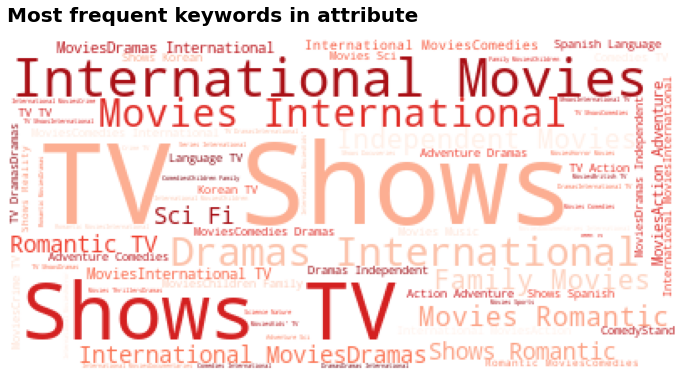

In [68]:
plt.figure(figsize=(12,12))
plt.imshow(cloud)
plt.axis('off')
plt.text(-1,-10,"Most frequent keywords in attribute", family='sans-serif', fontsize=20, weight='bold')

In [71]:
from PIL import Image

In [85]:
mask = np.array(Image.open('453-4532423_icon-netflix-logo-png-transparent-png.png'))
cloud2 = WordCloud(background_color='white',colormap='Reds',max_words=150, mask=mask).generate(''.join(movie['title'].tolist()))

Text(-1, -10, "Most common words used in movies/TV shows' titles")

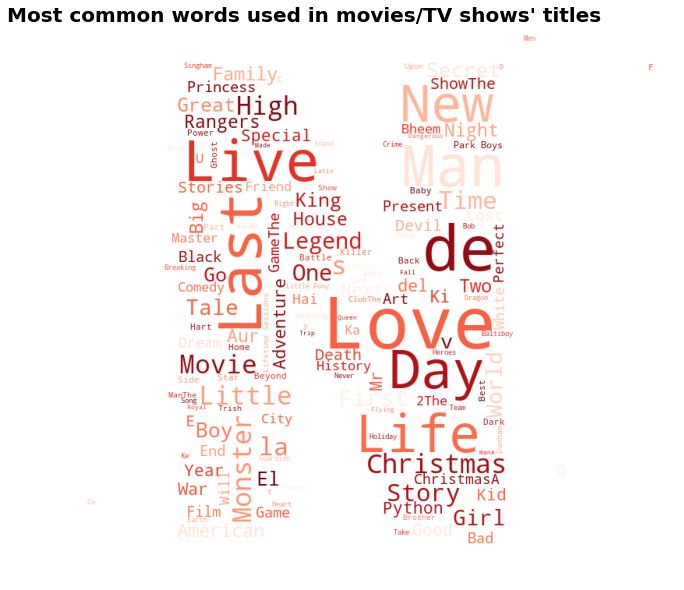

In [86]:
plt.figure(figsize=(12,12))
plt.imshow(cloud2)
plt.axis('off')
plt.text(-1,-10,"Most common words used in movies/TV shows' titles", family='sans-serif', fontsize=20, weight='bold')

# Bag-of-Words Model
When analyzing large amounts of natural language data(NLP), text must be converted into numbers, in form of vectors/matrix, as machine cannot work with raw text directly.

A popular and simple method is called the bag-of-words model.

Why it is named as “bag” of words is because all words in the document are disordered. The model only counts the occurance, and the positions are not considered.

A problem with bag-of-words model is that words with high frequency will dominate and get larger score), but higher frequency doesn't mean that word is informative, eg is/are/an/the.

Term Frequency – Inverse Document Frequency(TF-IDF) is introduced to "penalize" those highly frequent words. Term frequency and inverse document frequency refer to the frequency of the word and how rare the word is across documents respectively by giving a score, help highlighting distinct words to distinguish the difference. 

# Tfidftransformer vs. Tfidfvectorizer

Both can convert the text of raw documents into a matrix of TF-IDF.

Tfidftransformer: First compute word counts by CountVectorizer, then Tfidftransformer compute IDF values and Tf-idf scores.
Tfidfvectorizer: compute at once

Use Tfidftransformer if word count vectors are needed for different tasks.

In [87]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
#Replace NaN with an empty string, since the converter cannot deal with integer/float
movie['description'] = movie['description'].fillna('')

# Tfidftransformer

In [89]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movie['description'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [90]:
pd.DataFrame(tfidf_matrix[0].T.todense(), index=tfidf.get_feature_names(), columns=["tf-idf score"])

,tf-idf score
000,0.0
007,0.0
009,0.0
10,0.0
100,0.0
...,...
ömer,0.0
über,0.0
łukasz,0.0
ōarai,0.0


# Tfidfvectorizer

In [91]:
#CountVectorizer: Convert a collection of text documents to a matrix of token counts
#TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation

from sklearn.pipeline import Pipeline

pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfid', TfidfTransformer())]).fit(movie['description'])

print("CountVectorizer_matrix: {}".format(pipe['cv'].transform(movie['description']).toarray()))
print("CountVectorizer_matrix: {}".format(pipe['tfid'].idf_))

CountVectorizer_matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
CountVectorizer_matrix: [6.40499131 8.35090145 9.26719219 ... 9.26719219 9.26719219 9.26719219]


In [92]:
pipe['tfid'].idf_.shape

(17905,)

In [93]:
#The lower the IDF value of a word, the less unique it is to any particular document
pd.DataFrame(pipe['tfid'].idf_, index=pipe['cv'].get_feature_names(), columns=['idf_weights'])

,idf_weights
000,6.404991
007,8.350901
009,9.267192
10,6.246767
100,7.252289
...,...
ömer,9.267192
über,8.861727
łukasz,9.267192
ōarai,9.267192


# Limitation of TF-IDF
As the ordering of the sentence is discarded.
- compute similarity directly in the word-count space, which may be slow for large vocabularies
- assume the counts of different words are independent
- synonyms between words are ignored, eg trip and journey

# Cosine similarity

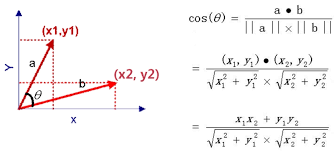

Three way to calculate similiarity
- Euclidean distance
- Pearson correlation
- Cosine similiarity

Here cosine similarity is used. It measures the cosine of the angle between two vectors projected in a multi-dimensional space to find out how similar the documents are irrespective of their size. The smaller the angle, higher the cosine similarity.

It is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document).

In [94]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [95]:
cosine_sim

array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

scikit-learn also provides pairwise metrics (aka kernels in machine learning parlance) that work for both dense and sparse representations of vector collections. In calculating similarity, a dot product is also needed (aka linear kernel).

On L2-normalized data, linear_kernel is equivalent to cosine similarity.

# Calculate cosine similarity by sklearn.pairwise.package

In [96]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim1 = linear_kernel(tfidf_matrix, tfidf_matrix)

In [97]:
cosine_sim1

array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

# Recommendation engine by description

In [192]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] #position 0 is the movie itself, thus exclude
    recommend_index = [i[0] for i in sim_score]
    rec_movie = movie['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

In [193]:
recommend('Avengers: Infinity War')

,Recommend programme,Similarity(0-1)
0,The Talented Mr. Ripley,0.1598
1,The Darkness,0.1376
2,Aliens Ate My Homework,0.1248
3,LEGO Marvel Super Heroes: Black Panther,0.1243
4,Chilling Adventures of Sabrina,0.1194
5,Vroomiz,0.1127
6,Orbiter 9,0.1094
7,Code Lyoko,0.1081
8,Vampires,0.1057
9,LEGO Marvel Super Heroes: Guardians of the Galaxy,0.1047


The first recommended programme of "Why Are We Getting So Fat?" is "Forks Over Knives", which is also health-related and emphasing the importance of what we had eaten.

In [194]:
recommend('Why Are We Getting So Fat?')

,Recommend programme,Similarity(0-1)
0,Forks Over Knives,0.1702
1,The Company Men,0.1405
2,Freeway: Crack in the System,0.1220
3,Here Alone,0.1028
4,Adam Ruins Everything,0.1028
5,X Large,0.1010
6,Marvel & ESPN Films Present: 1 of 1: Genesis,0.1000
7,The Great Hack,0.0995
8,Misfit,0.0969
9,MINDHUNTER,0.0962


"About Time" is a British romantic comedy-drama film about a man with the ability of time travel.

From the recommendation list, some romantic programmes are suggested, while programmes with description containing abverbs of time are also listed, eg "Tomorrow with You", "Running Out Of Time", "Second 20s" that "Running Out Of Time" is a Hong Kong action thriller film, rather than romantic firm.

In [195]:
recommend('About Time')

,Recommend programme,Similarity(0-1)
0,How to Be a Player,0.2325
1,Tomorrow with You,0.1992
2,The Wrong Missy,0.1916
3,The Legend of Michael Mishra,0.1880
4,World Famous Lover,0.1829
5,Jupiter Ascending,0.1758
6,Erased,0.1676
7,Carol,0.1572
8,Running Out Of Time,0.1562
9,Second 20s,0.1506


"Ninja Hattori" is actually the english name of "忍者ハットリくん", so the similarity score is far more than others, and on the top of recommedation list, ie recommend itself again.

This fault is attributed by the sources of dataset, instead of the algorithm. We need to beware of the dataset whether there are duplicates that showcased in different language in our training set.

In [196]:
recommend('忍者ハットリくん')

,Recommend programme,Similarity(0-1)
0,Ninja Hattori,0.5682
1,Reboot: The Guardian Code,0.1779
2,Let's Eat 2,0.1435
3,Reply 1994,0.1180
4,Deadly Switch,0.1122
5,The Married Couples,0.1074
6,My Husband Won't Fit,0.1060
7,Christmas in the Smokies,0.0980
8,Heidi,0.0890
9,Planet Earth: The Complete Collection,0.0847


# Problem of movie series

As above recommendation engine is constructed based on description only, it probably wouldn't suggest the movies in series, but movies with more similar key words.

Let's take "Indiana Jones" series as example, its serial movie aren't the top recommendation.

In [198]:
recommend("Indiana Jones and the Last Crusade")

,Recommend programme,Similarity(0-1)
0,Fate/Apocrypha,0.2318
1,Fate/EXTRA Last Encore,0.1949
2,Fate/Zero,0.1905
3,Indiana Jones and the Temple of Doom,0.1896
4,Fate/stay night: Unlimited Blade Works,0.1859
5,Indiana Jones and the Raiders of the Lost Ark,0.1820
6,Monty Python and the Holy Grail,0.1727
7,Indiana Jones and the Kingdom of the Crystal S...,0.1643
8,Pajanimals,0.1561
9,Dragons: Dawn of the Dragon Racers,0.1194


Sometimes, we watch movies not only based on genres, but the directors' filming style.

Steven Spielberg is a famous director and he has 12 movies in this dataset, including Indiana Jones' series, so movies filmed by him should also on the list.

In [109]:
movie.loc[movie['director']=='Steven Spielberg']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month
1242,s1243,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada",2021-01-01,2002,PG-13,141 min,Dramas,An FBI agent makes it his mission to put cunni...,2021.0,1.0
2799,s2800,Movie,Hook,Steven Spielberg,"Dustin Hoffman, Robin Williams, Julia Roberts,...",United States,2021-01-15,1991,PG,142 min,Children & Family Movies,"Peter Pan, now grown up and a workaholic, must...",2021.0,1.0
2990,s2991,Movie,Indiana Jones and the Kingdom of the Crystal S...,Steven Spielberg,"Harrison Ford, Cate Blanchett, Karen Allen, Ra...",United States,2019-01-01,2008,PG-13,123 min,"Action & Adventure, Children & Family Movies, ...",Indiana Jones is drawn into a Russian plot to ...,2019.0,1.0
2991,s2992,Movie,Indiana Jones and the Last Crusade,Steven Spielberg,"Harrison Ford, Sean Connery, Denholm Elliott, ...",United States,2019-01-01,1989,PG-13,127 min,"Action & Adventure, Children & Family Movies, ...","Accompanied by his father, Indiana Jones sets ...",2019.0,1.0
2992,s2993,Movie,Indiana Jones and the Raiders of the Lost Ark,Steven Spielberg,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",United States,2019-01-01,1981,PG,116 min,"Action & Adventure, Children & Family Movies, ...",When Indiana Jones is hired by the government ...,2019.0,1.0
2993,s2994,Movie,Indiana Jones and the Temple of Doom,Steven Spielberg,"Harrison Ford, Kate Capshaw, Amrish Puri, Rosh...",United States,2019-01-01,1984,PG,119 min,"Action & Adventure, Children & Family Movies, ...","Indiana Jones, his young sidekick and a spoile...",2019.0,1.0
3646,s3647,Movie,Lincoln,Steven Spielberg,"Daniel Day-Lewis, Sally Field, David Strathair...","United States, India",2018-02-21,2012,PG-13,150 min,Dramas,Director Steven Spielberg takes on the towerin...,2018.0,2.0
5430,s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018-04-01,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,2018.0,4.0
6069,s6070,Movie,The Adventures of Tintin,Steven Spielberg,"Jamie Bell, Andy Serkis, Daniel Craig, Nick Fr...","United States, New Zealand, United Kingdom",2019-11-20,2011,PG,107 min,Children & Family Movies,This 3-D motion capture adapts Georges Remi's ...,2019.0,11.0
7478,s7479,Movie,War Horse,Steven Spielberg,"Emily Watson, David Thewlis, Peter Mullan, Nie...","United States, India",2019-05-06,2011,PG-13,147 min,Dramas,"During World War I, the bond between a young E...",2019.0,5.0


# Recommendation engine by 5 attributes

In [151]:
#select programme type,country,genres,director & description
#join all the info together
#convert all words into lowercase so that algorithm will not distinguish as independent words
def bag_of_words(df):
    features = df['type']+' '+df['country']+' '+df['listed_in']+' '+df['director']+' '+df['description']
    return features.fillna('').str.lower()

In [153]:
features = bag_of_words(movie)

In [210]:
features.head(10)

0                                                     
1    movie mexico dramas, international movies jorg...
2    movie singapore horror movies, international m...
3    movie united states action & adventure, indepe...
4    movie united states dramas robert luketic a br...
5    tv show turkey international tv shows, tv dram...
6    movie egypt horror movies, international movie...
7    movie united states dramas kevin reynolds afte...
8    movie india horror movies, international movie...
9    movie india horror movies, international movie...
dtype: object

In [155]:
tfidf_matrix2 = tfidf.fit_transform(features)                
tfidf_matrix2.shape

(7787, 18992)

In [156]:
cosine_sim2 = cosine_similarity(tfidf_matrix2)

In [200]:
def recommend2(title, cosine_similarity=cosine_sim2):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim2[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] #position 0 is the movie itself, thus exclude
    recommend_index = [i[0] for i in sim_score]
    rec_movie = movie['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

Take Indiana Jones's series as example again, new recommendation engine now suggest its serial movies in the highest ranking. 

Also, Steven Spielberg's movies, such as "Schindler's List", "Lincoln", "The Adventures of Tintin Hook" are also on the list. "Indiana Jones and the Last Crusade" is about searching Holy Grail, in which story plot is similar to "Monty Python and the Holy Grail", so has a higher ranking.

In [201]:
recommend2("Indiana Jones and the Last Crusade")

,Recommend programme,Similarity(0-1)
0,Indiana Jones and the Temple of Doom,0.3764
1,Indiana Jones and the Raiders of the Lost Ark,0.3609
2,Indiana Jones and the Kingdom of the Crystal S...,0.2933
3,Monty Python and the Holy Grail,0.2480
4,Lincoln,0.2091
5,The Adventures of Tintin,0.1658
6,Hook,0.1570
7,Schindler's List,0.1529
8,Jagga Jasoos,0.1451
9,The Do-Over,0.1418
